In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0) # imread = 이미지 파일 불러오기
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

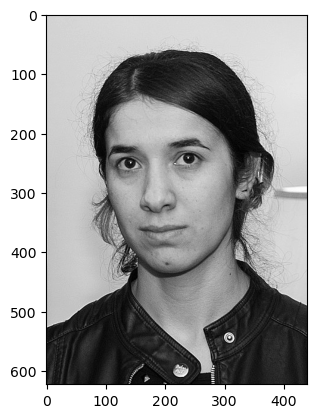

In [3]:
plt.imshow(nadia,cmap='gray')# imread = 이미지 띄우기 cmap ="gray" -> 회색조

In [4]:
#classifier (분류기) 를 만들고 XML classifier를 진행하는것 
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img) # X,y 는 분류기에서 검출된 이미지의 좌측상단 좌표, w,h는 그 이미지의 너비와 높이

    for(x,y,w,h) in face_rects:  
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10) #cv2.rectangle = 사각형 그리기 

    return face_img
    

In [6]:
result = detect_face(solvay)

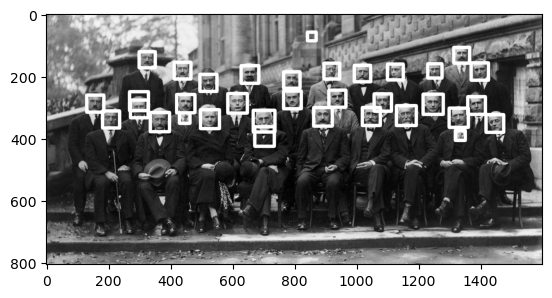

In [7]:
plt.imshow(result,cmap='gray') # 검출된 이미지 표시

In [8]:
def adj_detect_face(img):
    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5) #x,y 포지션, 사각형의 넓이와 높이도 포함
    #scalefactor : 영상 축소 비율 minNeighbors : 얼마나 많은 이웃 사각형이 검출되어야 최종 검출 영역으로 설정할지(정확도)

    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)

    return face_img

In [9]:
result = adj_detect_face(solvay)

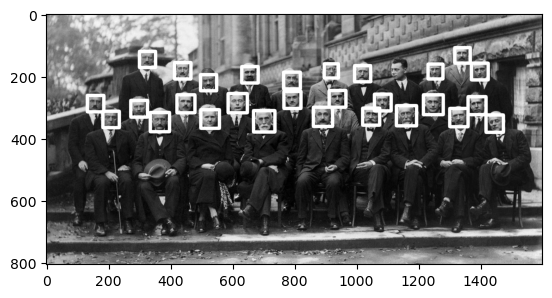

In [10]:
plt.imshow(result, cmap='gray')

In [11]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml') 
#캐스케이드 파일, 여기서 이건 눈을 detect 할 수 있게 함

In [12]:
def detect_eyes(img):
    face_img = img.copy()

    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=14) #x,y 포지션, 사각형의 넓이와 높이도 포함

    for(x,y,w,h) in eyes_rects:
        #cv2.circle(face_img,(x,y),(x+w,y+h),(255,255,255),2)
        cv2.circle(face_img,(x+int(w/2),y+int(h/2)),9,(255,255,255),1)

    return face_img

In [13]:
result = detect_eyes(nadia)

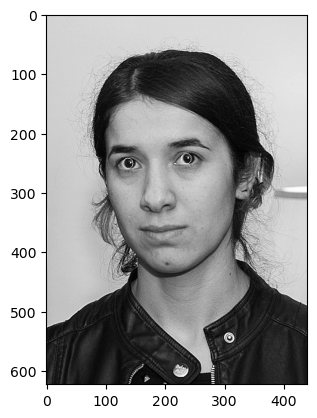

In [14]:
plt.imshow(result,cmap='gray')
#여기서 콧구멍도 눈이라고 생각해서 감지하는 경우가 발생할 수 있다. 이럴경우
#멀티스케일을 조절해야 함 -> 스케일 비율과 최소 이웃을 조절 

In [16]:
cap = cv2.VideoCapture(0)  #영상 인식 시작
while True:
    ret,frame = cap.read(0) 

    frame = detect_eyes(frame)

    cv2.imshow('video Face Detect', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()